In [1]:
import pandas as pd
import seaborn as sns

% matplotlib inline

#### Importing 2017 Homelessness Data

Sourced from [LAHSA](https://www.lahsa.org/documents?id=1495-homeless-count-2017-results-by-census-tract.xlsx)

In [2]:
xl = pd.ExcelFile("data/homeless-count-2017-results-by-census-tract.xlsx")

In [3]:
master_df = xl.parse("Count_by_Tract")

In [4]:
master_df.head()

,tract,Year,City,LACity,Community_Name,Detailed_Name,SPA,SD,CD,ca_ssd,...,totSHYouthSingYouth,totSHYouthFamHH,totSHYouthFamMem,totSHYouthUnaccYouth,totUnsheltPeople,totESPeople,totTHPeople,totSHPeople,totSheltPeople,totPeople
0,101110,2017,Los Angeles,1,Sunland-Tujunga,Sunland-Tujunga NC,2,5,7,25,...,0,0,0,0,1.000,0,0,0,0,1.000
1,101122,2017,Los Angeles,1,Sunland-Tujunga,Sunland-Tujunga NC,2,5,7,25,...,0,0,0,0,0.000,0,0,0,0,0.000
2,101210,2017,Los Angeles,1,Sunland-Tujunga,Sunland-Tujunga NC,2,5,7,25,...,0,0,0,0,5.095,0,0,0,0,5.095
3,101220,2017,Los Angeles,1,Sunland-Tujunga,Sunland-Tujunga NC,2,5,7,25,...,0,0,0,0,34.000,0,0,0,0,34.000
4,101300,2017,Los Angeles,1,Sunland-Tujunga,Sunland-Tujunga NC,2,5,7,25,...,0,0,0,0,20.108,0,0,0,0,20.108


In [5]:
master_df = master_df[master_df.LACity == 1]

#### Aggregating supplemental data

Aggregating 311 Call Data - Sourced from [Socrata](https://data.lacity.org/A-Well-Run-City/311-Homeless-Encampments-Requests/az43-p47q)

In [6]:
call_df = pd.read_csv("data/311_calls_w_CTs20171102134828.csv")
call_df.head()

,SRNUMBER,CREATEDDATE,UPDATEDDATE,ACTIONTAKEN,OWNER,REQUESTTYPE,STATUS,REQUESTSOURCE,MOBILEOS,ANONYMOUS,...,geometry,index_right,CT10,GEOID10,LABEL,OBJECTID,Shape_STAr,Shape_STLe,X_Center,Y_Center
0,1-482531983,03/13/2017 12:05:01 PM,03/16/2017 02:49:57 PM,SR Created,BOS,Homeless Encampment,Closed,Mobile App,iOS,N,...,POINT (-118.361314081 34.0775399484),1561,214400,6037214400,2144.0,1563,3.705377e+06,7957.457331,6453462.0,1851021.0
1,1-483651191,03/14/2017 10:41:53 AM,03/16/2017 03:34:03 PM,SR Created,BOS,Homeless Encampment,Closed,Self Service,NaN,Y,...,POINT (-118.361305439 34.0765199339),1561,214400,6037214400,2144.0,1563,3.705377e+06,7957.457331,6453462.0,1851021.0
2,1-484262051,03/14/2017 03:07:59 PM,03/16/2017 03:36:55 PM,SR Created,BOS,Homeless Encampment,Closed,Call,NaN,N,...,POINT (-118.36075993 34.076262344),1561,214400,6037214400,2144.0,1563,3.705377e+06,7957.457331,6453462.0,1851021.0
3,1-591624670,06/13/2017 02:54:13 PM,06/15/2017 02:22:42 PM,SR Created,BOS,Homeless Encampment,Closed,Mobile App,Android,N,...,POINT (-118.355460308 34.0779772979),1561,214400,6037214400,2144.0,1563,3.705377e+06,7957.457331,6453462.0,1851021.0
4,1-604986181,06/25/2017 11:41:42 AM,06/29/2017 03:11:26 PM,SR Created,BOS,Homeless Encampment,Closed,Self Service,NaN,N,...,POINT (-118.360549382 34.0779105967),1561,214400,6037214400,2144.0,1563,3.705377e+06,7957.457331,6453462.0,1851021.0


In [7]:
call_df.CREATEDDATE = pd.to_datetime(call_df.CREATEDDATE)
call_df["YEAR"] = call_df.CREATEDDATE.dt.year
call_df["MONTH"] = call_df.CREATEDDATE.dt.month
call_df = pd.DataFrame(call_df.groupby(["YEAR","MONTH","CT10"]).agg(["count"]).ix[:,0])

In [8]:
call_df.head()

SRNUMBER
                     count
YEAR MONTH CT10           
2017 1     101300       10
           102104        1
           102107        4
           103102        3
           103200       10

In [9]:
call_df.columns = ["call_counts"]

Aggregating Crime Data Sourced from [Socrata](https://data.lacity.org/A-Safe-City/Crime-Homeless-Victim-8-16-8-17/djbj-9vsp)

In [10]:
crime_df = pd.read_csv("data/crime_w_CTs20171102134814.csv")
crime_df.head()

,DR NUMBER,DATE REPORTED,DATE OCCURRED,TIME OCCURRED,AREA ID,AREA NAME,REPORTING DISTRICT,CRIME CODE,CRIME CODE DESCRIPTION,MO CODES,...,geometry,index_right,CT10,GEOID10,LABEL,OBJECTID,Shape_STAr,Shape_STLe,X_Center,Y_Center
0,160101129,08/01/2016,08/01/2016,1310,1,Central,147,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 1402 1218 0319 0342 0445,...,POINT (-118.2439 34.0442),691,206300,6037206300,2063.0,693,6.637587e+06,13167.165734,6487985.0,1837432.0
1,160120276,08/02/2016,08/01/2016,2215,1,Central,157,210,ROBBERY,0305 0344 0445 1218 0342 0429,...,POINT (-118.2443 34.0417),691,206300,6037206300,2063.0,693,6.637587e+06,13167.165734,6487985.0,1837432.0
2,160120325,08/02/2016,08/02/2016,1950,1,Central,156,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2004 1402 0416 1218 0445 1822,...,POINT (-118.2455 34.0437),691,206300,6037206300,2063.0,693,6.637587e+06,13167.165734,6487985.0,1837432.0
3,160120339,08/02/2016,08/02/2016,1700,1,Central,166,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1218 0416 0445,...,POINT (-118.2469 34.0421),691,206300,6037206300,2063.0,693,6.637587e+06,13167.165734,6487985.0,1837432.0
4,160120355,08/02/2016,08/02/2016,2115,1,Central,156,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0416 1218 2004,...,POINT (-118.2461 34.0428),691,206300,6037206300,2063.0,693,6.637587e+06,13167.165734,6487985.0,1837432.0


In [11]:
crime_df["DATE OCCURRED"] = pd.to_datetime(crime_df["DATE OCCURRED"])
crime_df["YEAR"] = crime_df["DATE OCCURRED"].dt.year
crime_df["MONTH"] = crime_df["DATE OCCURRED"].dt.month
crime_df = pd.DataFrame(crime_df.groupby(["YEAR","MONTH","CT10"]).agg(["count"]).ix[:,0])

In [12]:
crime_df.head()

DR NUMBER
                      count
YEAR MONTH CT10            
2016 8     104204         1
           113234         1
           113401         1
           117408         1
           117520         1

In [13]:
crime_df.columns = ["crime_counts"]

Aggregating Shelter Data

In [14]:
shelter_df = pd.read_csv("data/shelters_w_CTs20171102134808.csv")
shelter_df.head()

,LONGITUDE,LATITUDE,OBJECTID_left,SOURCE,EXT_ID,CAT1,CAT2,CAT3,ORG_NAME,NAME,...,geometry,index_right,CT10,GEOID10,LABEL,OBJECTID_right,Shape_STAr,Shape_STLe,X_Center,Y_Center
0,-118.243152,34.045219,97626377,211,NaN,Social Services,Homeless Shelters and Services,NaN,NaN,Special Service For Groups - Project 180,...,POINT (-118.2431520565494 34.0452189665425),1239,206200,6037206200,2062.0,1241,6.229435e+06,11677.50641,6488479.0,1839572.0
1,-118.240389,34.044049,97679054,211,NaN,Social Services,Homeless Shelters and Services,NaN,NaN,Los Angeles Centers For Alcohol And Drug Abuse...,...,POINT (-118.2403890559507 34.04404896709811),1239,206200,6037206200,2062.0,1241,6.229435e+06,11677.50641,6488479.0,1839572.0
2,-118.246126,34.046006,97679688,211,NaN,Social Services,Homeless Shelters and Services,NaN,www.svdpla.org,Society Of St. Vincent De Paul - Social Servic...,...,POINT (-118.2461260566815 34.04600596664324),1239,206200,6037206200,2062.0,1241,6.229435e+06,11677.50641,6488479.0,1839572.0
3,-118.244768,34.044656,97680073,211,NaN,Social Services,Homeless Shelters and Services,NaN,www.lahsa.org,Year Round Shelter - Sro Housing,...,POINT (-118.2447680566585 34.04465596716784),1239,206200,6037206200,2062.0,1241,6.229435e+06,11677.50641,6488479.0,1839572.0
4,-118.243403,34.044644,97680591,211,NaN,Social Services,Homeless Shelters and Services,NaN,www.dwcweb.org,Downtown Women's Center,...,POINT (-118.2434032567134 34.04464352704309),1239,206200,6037206200,2062.0,1241,6.229435e+06,11677.50641,6488479.0,1839572.0


In [15]:
shelter_df = pd.DataFrame(shelter_df.groupby("CT10").agg(["count"]).ix[:,0])

In [16]:
shelter_df.head()

,LONGITUDE
,count
CT10,
101220,1
113321,1
113401,2
117405,1
121802,2


In [17]:
shelter_df.columns = ["shelter_counts"]

Loading Census Tract Sizes - Sourced from [Census](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk)

In [18]:
census_df =  pd.read_csv("data/DEC_10_SF1_GCTPH1.CY07/DEC_10_SF1_GCTPH1.CY07_with_ann.csv", skiprows = 1, dtype = str)

In [19]:
#Removing LA County Rollup
census_df = census_df.ix[1:]

In [20]:
census_df["Target Geo Id2"].str.len().describe()

count    2346.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Target Geo Id2, dtype: float64

In [21]:
#Cutting of county prefix
census_df["tract"] = census_df["Target Geo Id2"].str.slice(start=5).astype(int)

#### Merge Data

In [22]:
master_df = master_df.merge(call_df.xs([2017,1]), how = "left", left_on = "tract", right_index = True)

In [23]:
master_df = master_df.merge(crime_df.xs([2017,1]), how = "left", left_on = "tract", right_index = True)

In [24]:
master_df = master_df.merge(shelter_df, how = "left", left_on = "tract", right_index = True)

In [25]:
master_df = master_df.merge(census_df[["tract", "Area in square miles - Land area"]], how = "left", left_on = "tract", right_on = "tract")

#### Data Exploration
Population Level

In [26]:
master_df.totPeople.describe()

count    1004.000000
mean       31.063064
std       115.721992
min         0.000000
25%         4.000000
50%        12.582500
75%        28.214000
max      3229.044000
Name: totPeople, dtype: float64

In [27]:
master_df.totPeople.quantile(0.99)

264.09293000000036

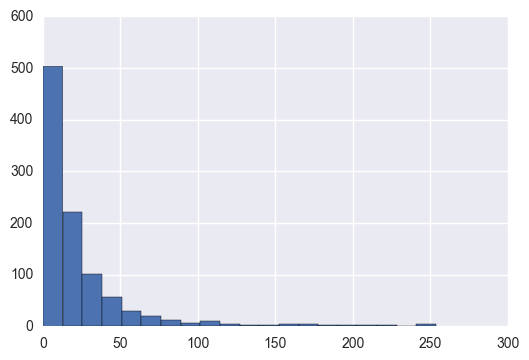

In [28]:
master_df[master_df.totPeople < master_df.totPeople.quantile(0.99)].totPeople.hist(bins = 20)

In [29]:
master_df.call_counts.fillna(0,inplace=True)
master_df.crime_counts.fillna(0, inplace=True)
master_df.shelter_counts.fillna(0, inplace = True)

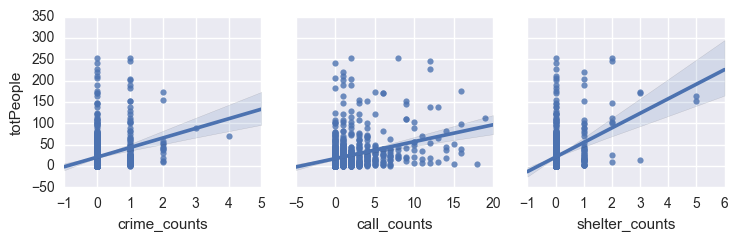

In [30]:
sns.pairplot(master_df[master_df.totPeople < master_df.totPeople.quantile(0.99)], x_vars = ["crime_counts","call_counts", "shelter_counts"], y_vars = ["totPeople"], kind = "reg")

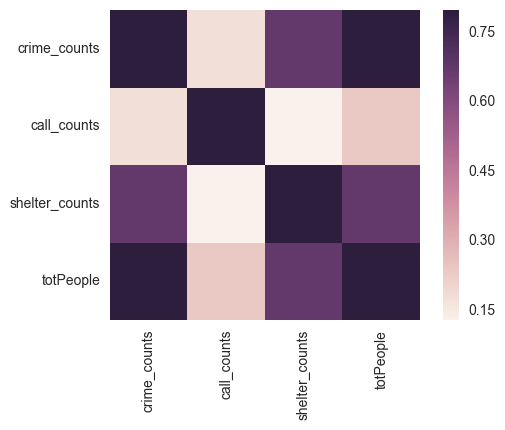

In [31]:
sns.heatmap(master_df[["crime_counts","call_counts", "shelter_counts", "totPeople"]].corr(), vmax=.8, square=True)

Density Level

In [32]:
master_df["Area in square miles - Land area"].isnull().sum()

1

In [33]:
master_df.dropna(subset=["Area in square miles - Land area"], inplace = True)

In [34]:
master_df["Area in square miles - Land area"] = master_df["Area in square miles - Land area"].astype(float)

In [35]:
master_df["Area in square miles - Land area"].describe()

count    1003.000000
mean        0.474796
std         0.842367
min         0.030000
25%         0.170000
50%         0.270000
75%         0.470000
max        17.040000
Name: Area in square miles - Land area, dtype: float64

In [36]:
master_df["Area in square miles - Land area"].quantile(0.95)

1.4289999999999998

In [37]:
master_df["density"] = master_df["totPeople"]/master_df["Area in square miles - Land area"]

In [38]:
master_df.density.describe()

count     1003.000000
mean       140.540545
std        525.259697
min          0.000000
25%         11.653731
50%         43.670000
75%        123.584895
max      13454.350000
Name: density, dtype: float64

In [39]:
master_df.density.quantile(0.99)

1513.4774385964938

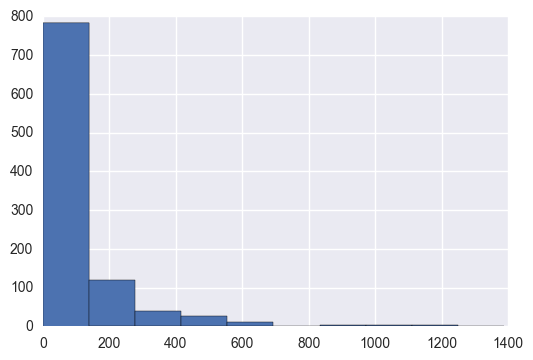

In [40]:
master_df[master_df.density < master_df.density.quantile(0.99)].density.hist()

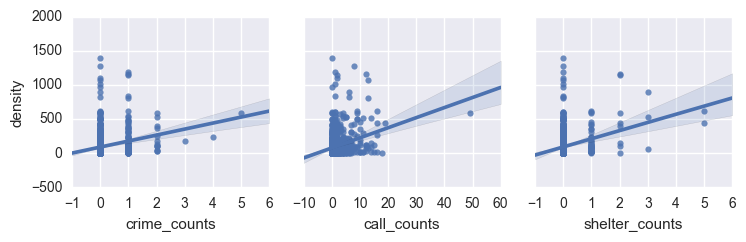

In [41]:
sns.pairplot(master_df[master_df.density < master_df.density.quantile(0.99)], x_vars = ["crime_counts","call_counts", "shelter_counts"], y_vars = ["density"], kind = "reg")

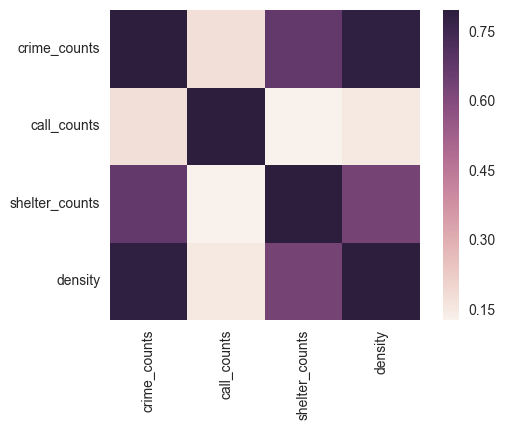

In [42]:
sns.heatmap(master_df[["crime_counts","call_counts", "shelter_counts", "density"]].corr(), vmax=.8, square=True)